In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_data = pd.read_csv('fraud_dataset.csv')

fraud_data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
fraud_data[fraud_data['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [6]:
normal_transact = fraud_data[fraud_data['isFraud'] == 0]
fraud_transact = fraud_data[fraud_data['isFraud'] == 1]
nonfraud = normal_transact.sample(n=8300, random_state=42)

fraud_train = pd.concat([fraud_transact, nonfraud], axis=0)

# Shuffle the resulting DataFrame to randomize the order of rows
fraud_train = fraud_train.sample(frac=1, random_state=42)

# Reset the index if needed
fraud_train.reset_index(drop=True, inplace=True)

# Display the resulting training dataset
fraud_train

       step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0       186   PAYMENT      809.67  C1755093302      315129.26       314319.59   
1       295  CASH_OUT   162756.90  C1466532646      162756.90            0.00   
2       659  TRANSFER  1423627.83   C552198318     1423627.83            0.00   
3       136  CASH_OUT  3263443.15   C252215515     3263443.15            0.00   
4       141  TRANSFER   424480.55  C1981957922      542213.00       117732.45   
...     ...       ...         ...          ...            ...             ...   
16508   382  CASH_OUT   542461.74   C664480557           0.00            0.00   
16509    40   CASH_IN     2032.93  C1544432489     7625673.00      7627705.93   
16510   484  CASH_OUT   156220.74   C389614238      156220.74            0.00   
16511    71  TRANSFER  1871553.73   C677678546     1871553.73            0.00   
16512   335   CASH_IN    98932.38  C2033626434     1609496.52      1708428.90   

          nameDest  oldbala

In [9]:
fraud_train.shape

(16513, 11)

In [17]:
fraud_train = fraud_train.drop(['isFlaggedFraud','nameOrig','nameDest'], axis = 1)

fraud_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,186,PAYMENT,809.67,315129.26,314319.59,0.00,0.00,0
1,295,CASH_OUT,162756.90,162756.90,0.00,927190.11,1089947.01,1
2,659,TRANSFER,1423627.83,1423627.83,0.00,0.00,0.00,1
3,136,CASH_OUT,3263443.15,3263443.15,0.00,927721.34,4191164.50,1
4,141,TRANSFER,424480.55,542213.00,117732.45,371984.70,796465.26,0
...,...,...,...,...,...,...,...,...
16508,382,CASH_OUT,542461.74,0.00,0.00,1757516.20,2299977.94,0
16509,40,CASH_IN,2032.93,7625673.00,7627705.93,323961.50,321928.56,0
16510,484,CASH_OUT,156220.74,156220.74,0.00,0.00,156220.74,1
16511,71,TRANSFER,1871553.73,1871553.73,0.00,0.00,0.00,1


In [19]:
fraud_dum = pd.get_dummies(data = fraud_train,columns = ['type'], drop_first = True)

fraud_dum.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,186,809.67,315129.26,314319.59,0.00,0.00,0,0,0,1,0
1,295,162756.90,162756.90,0.00,927190.11,1089947.01,1,1,0,0,0
2,659,1423627.83,1423627.83,0.00,0.00,0.00,1,0,0,0,1
3,136,3263443.15,3263443.15,0.00,927721.34,4191164.50,1,1,0,0,0
4,141,424480.55,542213.00,117732.45,371984.70,796465.26,0,0,0,0,1


In [21]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
fraud_scaled = rscaler.fit_transform(fraud_dum)
fraud_sc = pd.DataFrame(fraud_scaled, columns = fraud_dum.columns)

fraud_sc.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.389558,-0.348350,0.249343,314319.59,0.000000,-0.119035,0.0,0.0,0.0,1.0,0.0
1,0.048193,-0.024207,0.054830,0.00,1.749269,0.880275,1.0,1.0,0.0,0.0,0.0
2,1.510040,2.499471,1.664417,0.00,0.000000,-0.119035,1.0,0.0,0.0,0.0,1.0
3,-0.590361,6.181926,4.013065,0.00,1.750271,3.723604,1.0,1.0,0.0,0.0,0.0
4,-0.570281,0.499643,0.539231,117732.45,0.701799,0.611198,0.0,0.0,0.0,0.0,1.0


In [22]:
X = fraud_sc.drop('isFraud', axis = 1)

y = fraud_sc['isFraud'] 

X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.389558,-0.348350,0.249343,314319.59,0.000000,-0.119035,0.0,0.0,1.0,0.0
1,0.048193,-0.024207,0.054830,0.00,1.749269,0.880275,1.0,0.0,0.0,0.0
2,1.510040,2.499471,1.664417,0.00,0.000000,-0.119035,0.0,0.0,0.0,1.0
3,-0.590361,6.181926,4.013065,0.00,1.750271,3.723604,1.0,0.0,0.0,0.0
4,-0.570281,0.499643,0.539231,117732.45,0.701799,0.611198,0.0,0.0,0.0,1.0


In [23]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [26]:
possible_algos = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = possible_algos.fit(X_train, X_test, y_train, y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [11:40<00:12, 12.32s/it]  File "C:\Users\Hp\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 233, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))


[LightGBM] [Info] Number of positive: 5749, number of negative: 5810
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.333341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 11559, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497361 -> initscore=-0.010555
[LightGBM] [Info] Start training from score -0.010555


100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:01:39<00:00, 127.55s/it]


In [27]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,0.99,0.99,2997.41
XGBClassifier,0.99,0.99,0.99,0.99,30.66
BaggingClassifier,0.99,0.99,0.99,0.99,2.28
RandomForestClassifier,0.99,0.99,0.99,0.99,7.34
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.50
ExtraTreesClassifier,0.99,0.99,0.99,0.99,3.63
AdaBoostClassifier,0.98,0.98,0.98,0.98,16.18
ExtraTreeClassifier,0.97,0.97,0.97,0.97,0.33
KNeighborsClassifier,0.94,0.94,0.94,0.94,5.21


In [29]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier 
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier


In [30]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(n_estimators=50, random_state=42)
lgbm = lgb.LGBMClassifier()
ext = ExtraTreesClassifier(n_estimators=50, random_state=42)

In [31]:
models = {
    'dtc': dtc,
    'rfc': rfc,
    'gbc': gbc,
    'lgbm': lgbm,
    'xgb': xgb,
    'ext': ext
}

In [32]:
def modelling (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    model_accuracy = accuracy_score(y_test, y_preds)
    model_precision = precision_score(y_test, y_preds)
                                      
    return model_accuracy, model_precision

In [33]:
accuracy = []
precision = []

for name,model in models.items():
    
    the_accuracy, the_precision = modelling(model, X_train, y_train, X_test, y_test)
    
    print ('For', name)
    print('Accuracy score:', the_accuracy)
    print('Precision score:', the_precision)
    
    accuracy.append(the_accuracy)
    precision.append(the_precision)

For dtc
Accuracy score: 0.9876867178037949
Precision score: 0.985062575696407
For rfc
Accuracy score: 0.9895034315704482
Precision score: 0.9831730769230769
For gbc
Accuracy score: 0.985062575696407
Precision score: 0.974960254372019
[LightGBM] [Info] Number of positive: 5749, number of negative: 5810
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 11559, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497361 -> initscore=-0.010555
[LightGBM] [Info] Start training from score -0.010555
For lgbm
Accuracy score: 0.9931368591037545
Precision score: 0.9887369267900241
For xgb
Accuracy score: 0.9921275736778361
Precision score: 0.9863618130766145
For ext
Accuracy score: 0.9848607186112233
Precision score: 0.9814590890769851


In [34]:
model_performance = pd.DataFrame({'Algorithm':models.keys(), 'Accuracy': accuracy, 'Precision': precision})

model_performance

,Algorithm,Accuracy,Precision
0,dtc,0.99,0.99
1,rfc,0.99,0.98
2,gbc,0.99,0.97
3,lgbm,0.99,0.99
4,xgb,0.99,0.99
5,ext,0.98,0.98


In [36]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score

Accuracy Score is:  0.9921259842519685
F1 Score is:  0.9921268340791295
Recall Score is:  0.9921259842519685
Precision Score is:  0.9921633692497505


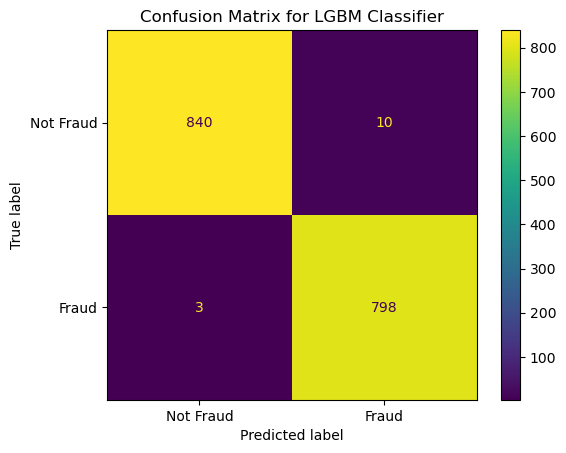

In [37]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
    "n_estimators": 500,
    "learning_rate": 0.09,
    "random_state": 42,
#     "enable_categorical": True 
}

fold = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgbm = XGBClassifier(**params)
    lgbm.fit( X_train, y_train)
    lgboost = lgbm.predict(X_test)
    
    acc_score= accuracy_score(y_test, lgboost)
    f1= f1_score(y_test, lgboost, average='weighted')
    recall= recall_score(y_test, lgboost, average='weighted')
    precision= precision_score(y_test, lgboost, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

print("Accuracy Score is: ", np.mean(AccuracyScore))
print("F1 Score is: ", np.mean(f1score))
print("Recall Score is: ", np.mean(RecallScore))
print("Precision Score is: ", np.mean(PrecisionScore))

confuison_matrix = confusion_matrix(y_true=y_test, y_pred=lgboost)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuison_matrix, display_labels=["Not Fraud", "Fraud"])
cm_display.plot()
plt.title("Confusion Matrix for LGBM Classifier");

In [38]:
import joblib

joblib.dump(lgbm, "Light.pkl")

['Light.pkl']

In [39]:
import pickle

pickle.dump(lgbm, open('Lights.pkl', 'wb'))